<a href="https://colab.research.google.com/github/vandana10/deeplearning-using-pytorch/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pytorch workflow

In [2]:
what_were_covering = {1: "data - prepare and load",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [3]:
import torch
from torch import nn # nn contains all pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__


'2.8.0+cu126'

###Data preparing and loading

data can be ANYTHING!

ML is a game of two parts:
1. get data inot a numerical representation
2. build a model to learn patterns in that numerical representation

We'll use a linear regression formula to make a striaght line with known parameters

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets(one of the most imp concepts in ML in general)

Lets create a training and test set with our data

In [6]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
X_train

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

How might we better visualise our data?

In [8]:
def plot_predictions(train_data=X_train,
                     train_lables=y_train,
                     test_data=X_test,
                     test_Lables=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_lables, c="b", s=4, label="training data")

  plt.scatter(test_data, test_Lables, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14})



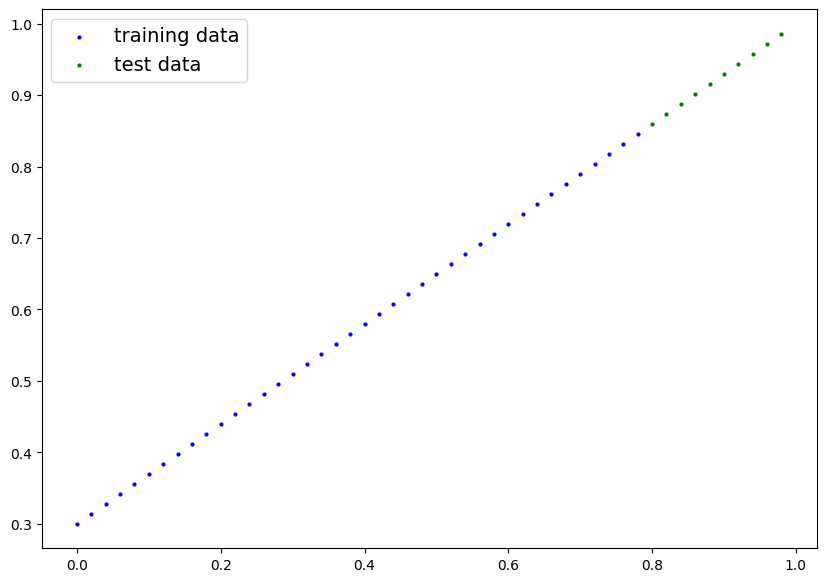

In [9]:
plot_predictions();

## 2. Build model

Our first model

what our model deos?
1. start with random values(weights and bias)
2. look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create data)

how does it do? Through two main algos:
1. Gradient descent
2. Backpropagation

In [10]:
#Create lineat regression model class

class LinearRegressionModel(nn.Module): # almost everything in pytorch inhertis from nn modul
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: #x is in the input data
    return self.weights * x + self.bias


###PyTorch model building essentials
* torch.nn - contains all of the building for computational graphs
* torch.nn.Parameter - what params should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.module - base class for all neural network modules
* torch.optim - optimizers of pytorch, they will help with gradient descent
* def forward() - method defines what happens in forward progagation

###Checking the contents of out PyTorch model
use .parameters()

In [11]:
#Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight,bias

(0.7, 0.3)

In [14]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making prediction using torch.inference.mode()

To check our model's predictive power, lets see how well it predicts 'y test' based on 'X test'

when we pass our data through our model, its going to run it through the
forward method

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

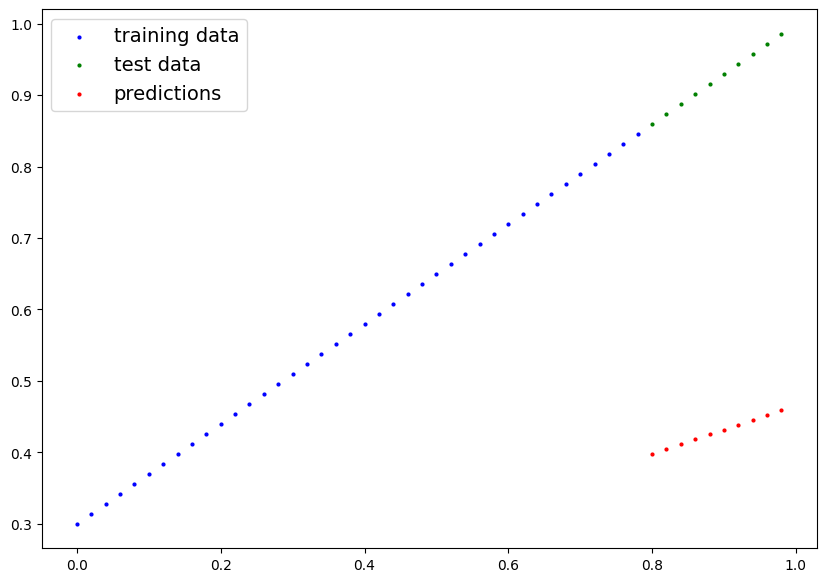

In [16]:
plot_predictions(predictions=y_preds)

###Train model

the whole idea of training for a model is to move from some unknown parameters (random) to some known params

Poor representation of data -> better representation of data

One way to measure how poor/wrong your models are use Loss functions

note: loss function / cost function / criterion

Loss function: a func to measure how wrong your models predictions are to the ideal outputs, lower is better

Optimiser - takes into account the loss of a model and adjusts the models' weights and bias to improve the loss func

and for PyTorch we need:
Training loop and Testing loop

In [17]:
#Set up loss fucntion
loss_fn = nn.L1Loss()

#set up optimiser (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr=learning rate


###Building a training loop(and a testing loop) in PyTorch

Training loop:

0. Loop through the data and do
1. forward pass (involves data moving through our model's forward() -also called Forward propagation
2. calculate the loss (compare forward pass predictions with ground truth)
3. optimise zero grad
4. loss backward -  move backwards through the netwoek to calc the gradients of each the params of our model wrt loss
5. Optimiser step - use the optimiser to adjust our model's params to try and improve the loss (** gradient descent**)

In [18]:
#an epoch is one loop through the data
epochs = 200

#Track diff values
epoch_count = []
train_loss_values = []
test_loss_values = []

#Training
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()

  #1. forward pass
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)


  #3. optimiser zero grad
  optimizer.zero_grad()

  #4. Perform back propagation on the loss wrt params of the model
  loss.backward()

  #5. Step the optimiser (perform GD)
  #by default how the optimiser changes will accumulate through the loop so.. we have to zero them in step 3 for the next interation of the loop
  optimizer.step()

  #Testing
  model_0.eval() #turns off diff settings in the model not needed for evaluation/testing
  with torch.inference_mode(): #turns of gradient tracking and a couple more things
    #1. forward pass
    test_pred = model_0(X_test)

    #2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  if(epoch % 10 ==0):
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())





epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
epoch: 70 | Loss: 0.03

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [20]:
epoch_count, train_loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

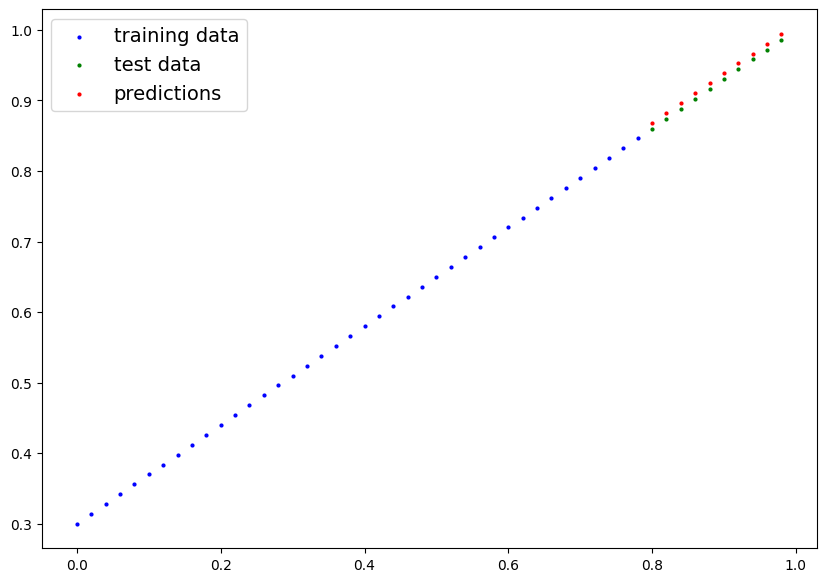

In [21]:
plot_predictions(predictions=y_preds_new)

/tmp/ipython-input-2537237053.py:3: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label="train loss")


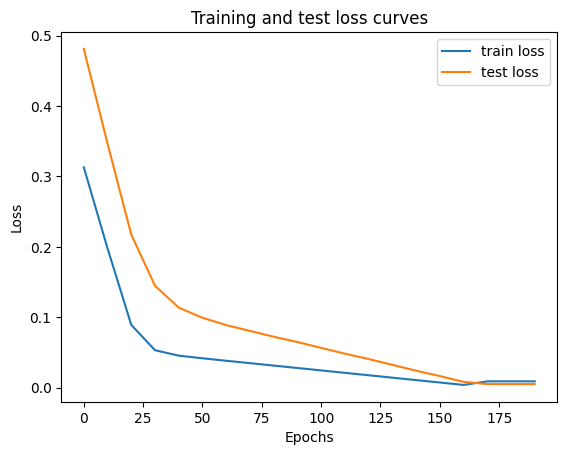

In [22]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

###Saving a model in PyTorch

There are three main methods for saving and loading:
1. torch.save() -> allows to save your model in pickle format
2. torch.load() - allows to load a saved pytorch obj
3. torch.nn.module.load_state_dict() - allows to load a model's saved state dict

In [23]:
#saving our model

from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

#Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = model_path / MODEL_NAME

#3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [24]:
model_0

LinearRegressionModel()

###Loading a model

Since we saved models' state dict, we'll create a new instance of our model class and load the saved state dict

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
loaded_model_0 = LinearRegressionModel()
#will have random weights and bias
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [27]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# Make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [29]:
model_0.eval()
with torch.inference_mode():
  model_0_preds = model_0(X_test)
model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

###Putting it all together

In [30]:
import torch
from torch import nn
import matplotlib.pyplot as plt
